In this lecture, we will create a model to learn reward values for two stimuli: “green” and “red.”

In [1]:
# import packages
import numpy as np
import pylab as plt
import seaborn as sns

# allow inline plotting in the notebook
%matplotlib inline

sns.set_style('darkgrid')
palette = sns.light_palette('purple', 10)[::3]
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
def update_critic(S, V, rw, eta=0.25):
    # Formula for RPE
    RPE = rw - np.sum(S*V)

    # the new reward values are updated according to RPE
    delta_V = S*eta*RPE
    V = V + delta_V
    return V, RPE

In [3]:
# Was each stimulus presented?
S = np.array([1, 1])

# Initial reward values for stimuli
V = np.array([1, 1])

# Was reward presented?
rw = 1

V, RPE = update_critic(S, V, rw)
print RPE
print V

-1
[ 0.75  0.75]


In [4]:
stimuli = np.ones(40)
rewards = np.append(np.ones(20), np.zeros(20))

Vs = [0]
RPEs = []

V = Vs[0]
for i in range(len(stimuli)):
    S = stimuli[i]
    rw = rewards[i]
    V, RPE = update_critic(S, V, rw)
    Vs.append(V)
    RPEs.append(RPE)

/Users/salo/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


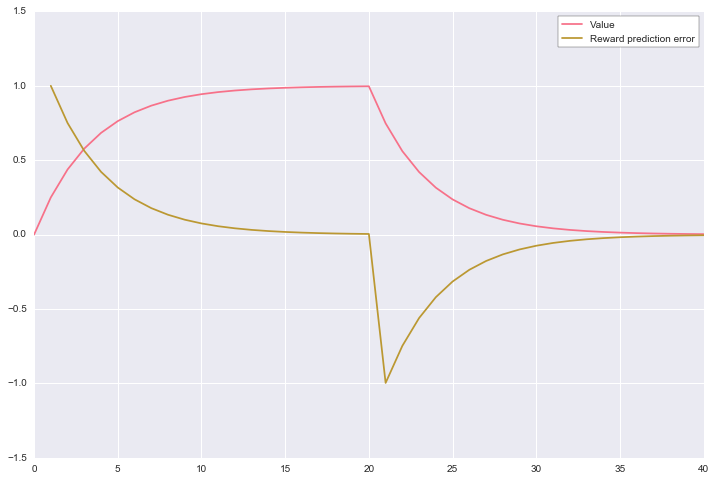

In [5]:
fig, ax = plt.subplots()
ax.plot(range(len(Vs)), Vs, label='Value')
ax.plot(np.arange(len(RPEs))+1, RPEs, label='Reward prediction error')

ax.set_ylim((-1.5, 1.5))

legend = ax.legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

fig.show()

In [6]:
# create an array with reward values across trials
rewards = np.ones(40)

# create an array indicating that stimulus A is presented in 40 trials
S_A = np.ones((40,1))

# create an array indicating that stimulus B is NOT presented in the first 20 trials,
# and it is presented in the last 20 trials
S_B = np.zeros((20,1))
S_B = np.append(S_B, np.ones((20,1)), axis=0)

# put the two arrays together in a matrix, with rows representing trials and columns s
stimuli = np.append(S_A, S_B, axis=1)

Vs = np.zeros((stimuli.shape[0]+1, stimuli.shape[1]))
RPEs = np.zeros((stimuli.shape[0]))

for i in range(len(stimuli)):
    Vs[i+1], RPEs[i] = update_critic(stimuli[i, :], Vs[i], rewards[i])

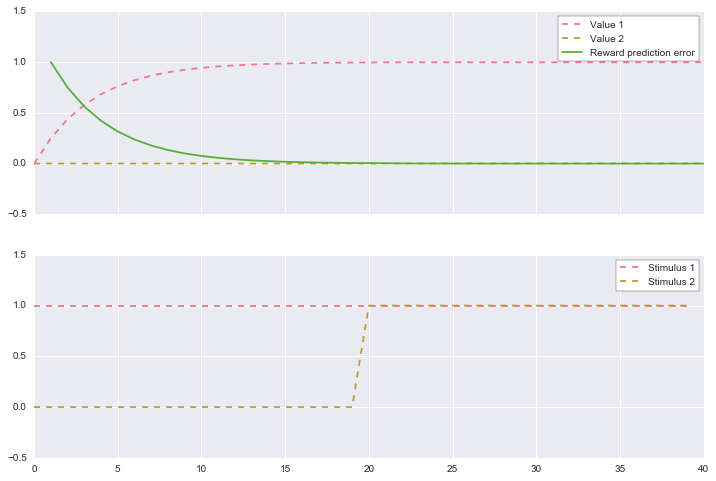

In [8]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(range(len(Vs)), Vs[:, 0], '--', label='Value 1')
axes[0].plot(range(len(Vs)), Vs[:, 1], '--', label='Value 2')
axes[1].plot(range(len(stimuli)), stimuli[:, 0], '--', label='Stimulus 1')
axes[1].plot(range(len(stimuli)), stimuli[:, 1], '--', label='Stimulus 2')

axes[0].plot(np.arange(len(RPEs))+1, RPEs, label='Reward prediction error')

axes[0].set_ylim((-.5, 1.5))
axes[1].set_ylim((-.5, 1.5))

legend = axes[0].legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

legend = axes[1].legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

fig.show()